# Deep neural network for image binary classification: Hotdog or Not hotdog?

Test the deep neural network framework by implementing the function of the SeaFood APP from the TV show Silicon Valley. The question we are asking here is if something a Hotdog or Not a Hotdog! 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import zipfile
from src.utils import *
from src.ANN import *

### 1. Download the hotdog dataset from keegle api and pre-processing

In [2]:
# download the hot-dog-not-hot-dog dataset
os.chdir("./data")
! kaggle datasets download -d dansbecker/hot-dog-not-hot-dog      # need keegle public key for this. 
os.chdir("..")

# unzip
with zipfile.ZipFile("./data/hot-dog-not-hot-dog.zip", 'r') as zip_ref:
    zip_ref.extractall("./data")

hot-dog-not-hot-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# Get dir of train and test sets.
train_hotdog_dirs = ["./data/seefood/train/hot_dog/"+ i for i in os.listdir("./data/seefood/train/hot_dog/")]
train_not_hotdog_dirs = ["./data/seefood/train/not_hot_dog/"+ i for i in os.listdir("./data/seefood/train/not_hot_dog/")]
test_hotdog_dirs = ["./data/seefood/test/hot_dog/"+ i for i in os.listdir("./data/seefood/test/hot_dog/")]
test_not_hotdog_dirs = ["./data/seefood/test/not_hot_dog/"+ i for i in os.listdir("./data/seefood/test/not_hot_dog/")]
print(f"number of train: {len(train_hotdog_dirs)+len(train_not_hotdog_dirs)}")
print(f"number of test: {len(test_hotdog_dirs)+len(test_not_hotdog_dirs)}")

number of train: 498
number of test: 500


In [4]:
# test set is too large, thus we need to tranfer some samples from test set to train set.
random.shuffle(test_hotdog_dirs)
list_1, list_2 = split_list(test_hotdog_dirs,50)
test_hotdog_dirs = list_1
train_hotdog_dirs+=list_2

random.shuffle(test_not_hotdog_dirs)
list_1,list_2 = split_list(test_not_hotdog_dirs,50)
test_not_hotdog_dirs = list_1
train_not_hotdog_dirs+=list_2

In [5]:
# assemble train and test set. 
image_size = 80

# train set x
train_x_orig_t = load_images(train_hotdog_dirs,image_size) # train images that are hotdog.
train_x_orig_f = load_images(train_not_hotdog_dirs,image_size) # train images that are not hotdog
train_x_orig = np.concatenate((train_x_orig_t,train_x_orig_f)) 

# train set y
m_train_t = train_x_orig_t.shape[0]
m_train_f = train_x_orig_f.shape[0]
m_train = m_train_t+m_train_f
train_y = np.concatenate((np.zeros((1,m_train_t))+1,np.zeros((1,m_train_f))),axis=1)

# test set x
test_x_orig_t = load_images(test_hotdog_dirs,image_size) # test images that are hotdog.
test_x_orig_f = load_images(test_not_hotdog_dirs,image_size) # test images that are not hotdog
test_x_orig = np.concatenate((test_x_orig_t,test_x_orig_f)) 

# test set y
m_test_t = test_x_orig_t.shape[0]
m_test_f = test_x_orig_f.shape[0]
m_test = m_test_t+m_test_f
test_y = np.concatenate((np.zeros((1,m_test_t))+1,np.zeros((1,m_test_f))),axis=1)

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(image_size) + ", " + str(image_size) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))


Number of training examples: 898
Number of testing examples: 100
Each image is of size: (80, 80, 3)
train_x_orig shape: (898, 80, 80, 3)
train_y shape: (1, 898)
test_x_orig shape: (100, 80, 80, 3)
test_y shape: (1, 100)


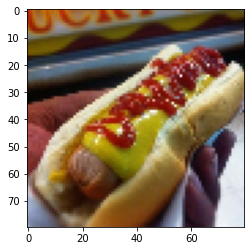

In [6]:
# Example image
plt.imshow(train_x_orig[10])

In [7]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T 
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (19200, 898)
test_x's shape: (19200, 100)


### 2. Train a deep neural network model for 4 layers

It turns out that the 5 player neural network here overfit the data:

In [8]:
### CONSTANTS ###
layers_dims = [train_x.shape[0], 40, 20, 10, 5, 1] #  5-layer model

In [9]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.7002663763151115
Cost after iteration 100: 0.6658562934598058
Cost after iteration 200: 0.584234231792265
Cost after iteration 300: 0.6527617449662714
Cost after iteration 400: 0.5477606299558871
Cost after iteration 500: 0.517592451933132
Cost after iteration 600: 0.48612735232923554
Cost after iteration 700: 0.481595658633116
Cost after iteration 800: 0.43209244060171453
Cost after iteration 900: 0.4723126200355753
Cost after iteration 1000: 0.36862203848837416
Cost after iteration 1100: 0.30190123533282237
Cost after iteration 1200: 0.2706623154015879
Cost after iteration 1300: 0.4474086322447748
Cost after iteration 1400: 0.2577437718039691
Cost after iteration 1500: 0.19560397068093574
Cost after iteration 1600: 0.17409740929469766
Cost after iteration 1700: 0.3612262102695537
Cost after iteration 1800: 0.40927325585268004
Cost after iteration 1900: 0.17838774399741172
Cost after iteration 2000: 0.154433227639163
Cost after iteration 2100: 0.1420185279753

In [10]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9944320712694875


In [11]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.63
